In [275]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Q1 HEP

In [276]:
df = pd.read_csv('hepatitis_csv.csv')

In [277]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [278]:
df = df.dropna(thresh=len(df)*0.75, axis=1)*1

In [279]:
df.fillna(df.median(numeric_only=True).round(1), inplace=True)

In [280]:
df = pd.get_dummies(df, drop_first=True)

/home/student/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [281]:
df = df.dropna()

In [282]:
hep_arr = df.to_numpy()
df

,age,antivirals,bilirubin,alk_phosphate,sgot,albumin,histology,sex_male,steroid_1,fatigue_1,malaise_1,anorexia_1,liver_big_1,liver_firm_1,spleen_palpable_1,spiders_1,ascites_1,varices_1,class_live
0,30,0,1.0,85.0,18.0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,50,0,0.9,135.0,42.0,3.5,0,0,0,1,0,0,0,0,0,0,0,0,1
2,78,0,0.7,96.0,32.0,4.0,0,0,1,1,0,0,1,0,0,0,0,0,1
3,31,1,0.7,46.0,52.0,4.0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,34,0,1.0,85.0,200.0,4.0,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,0,7.6,85.0,242.0,3.3,1,0,1,1,1,1,1,0,0,1,1,1,0
151,44,0,0.9,126.0,142.0,4.3,1,0,1,1,0,0,1,1,0,0,0,0,1
152,61,0,0.8,75.0,20.0,4.1,1,0,0,1,1,0,0,1,0,1,0,0,1
153,53,0,1.5,81.0,19.0,4.1,1,1,0,1,0,0,1,0,1,1,0,1,1


In [283]:
from sklearn.model_selection import train_test_split

X = df['albumin'].to_numpy()
y = df['class_live'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# Q2 HEP

In [284]:
lr = LinearRegression()
lr.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

In [285]:
predictions = lr.predict(X_test.reshape(-1,1))

In [286]:
print(f'MSE: {mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

MSE: 0.13014086053344287
RMSE: 0.3607504130745284


In [287]:
print(f'Intercept: {lr.intercept_}')
print(f'Slope: {lr.coef_}')

Intercept: -0.32933631042625744
Slope: [0.29160809]


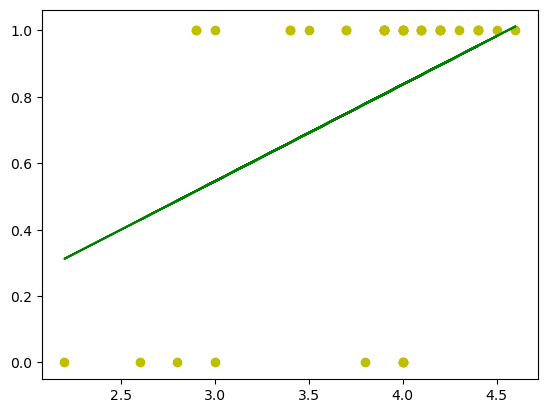

In [288]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='y')
plt.plot(X_test, predictions, color='g')